In [1]:
from algorithms import *
from algorithms.MlpV2 import *
data = Data()
data.print_shapes()
X_train = data.train_data
y_train = data.train_label

(40000, 128)
(40000, 10)
(10000, 128)
(10000, 10)
(10000, 128)
(10000, 10)


In [2]:
X_test = data.test_data
y_test = data.test_label
X_dev = data.validation_data
y_dev = data.validation_label

In [3]:
MOMENTUM = 0.9

In [4]:
keep_rate_option = [1,0.8,0.5,0.2]
optimiser_option = [("Momentum",[0,0]),("Momentum",[0.9,0.9]),("Adam",[0.9,0.99])]
weight_decay_strength = [0.1,0.01,0.001,0]
lr = 0.01
batch_size = 128 


In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [33]:
loss = []
train_acc = []
dev_acc = []
train_precision = []
dev_precision = []
train_recall = []
dev_recall = []
train_f1 = []
dev_f1 = []
model = [] 

In [34]:
# store info in a dataframe

for keep_rate in keep_rate_option:    
    nn = MlpV2(learning_rate=lr, batch_size=batch_size)
    nn.set_optimiser(opt_type='Adam', params = [0.9,0.99])
    nn.set_batchNormalizer()
    nn.add_layer(128,512,"leaky_relu",keep_rate)
    nn.add_layer(512,256,"leaky_relu",keep_rate)
    nn.add_layer(256,128,"leaky_relu",keep_rate)
    nn.add_layer(128,64,"leaky_relu",keep_rate)
    nn.add_layer(64,10,"softmax",1)
    
    train_loss = nn.fit(X_train, y_train, epochs=50)
    loss.append(train_loss)

    acc = nn.evaluate(X_train, y_train)
    train_acc.append(acc)
    
    t_acc = nn.evaluate(X_dev, y_dev)
    dev_acc.append(t_acc)
        
    y_pred_train = np.argmax(nn.predict(X_train), axis=1)
    y_train_transformed = np.argmax(y_train, axis=1)
    y_pred_dev = np.argmax(nn.predict(X_dev), axis=1)
    y_dev_transformed = np.argmax(y_dev, axis=1)
        
    precision = precision_score(y_train_transformed, y_pred_train, average='macro')
    recall = recall_score(y_train_transformed, y_pred_train, average='macro')
    f1 = f1_score(y_train_transformed, y_pred_train, average='macro')
        
    train_precision.append(precision)
    train_recall.append(recall)
    train_f1.append(f1)
        
    t_precision = precision_score(y_dev_transformed, y_pred_dev, average='macro')
    t_recall = recall_score(y_dev_transformed, y_pred_dev, average='macro')
    t_f1 = f1_score(y_dev_transformed, y_pred_dev, average='macro')
        
    dev_precision.append(t_precision)
    dev_recall.append(t_recall)
    dev_f1.append(t_f1)

    model.append(nn)

In [ ]:
d_holder = [loss,train_acc,dev_acc,train_precision,dev_precision,train_recall,dev_recall,train_f1,dev_f1, model]

In [9]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
d_holder[0][0]

(array([2.36634058, 1.94440209, 1.76670983, 1.67374779, 1.61288696,
        1.56570305, 1.52088236, 1.47823996, 1.4357229 , 1.39118323,
        1.34676709, 1.30521454, 1.26725066, 1.23340257, 1.21170809,
        1.18605584, 1.167497  , 1.15347181, 1.13007673, 1.11658079,
        1.10010036, 1.09385601, 1.08635103, 1.07851048, 1.07307636,
        1.06859197, 1.05748513, 1.06231271, 1.05560575, 1.04477974,
        1.04320906, 1.03860049, 1.02901073, 1.03075571, 1.02258579,
        1.02646783, 1.02420492, 1.02131222, 1.01672004, 1.01836907,
        1.01724378, 1.01608428, 1.01543196, 1.0168531 , 1.02155011,
        1.01434613, 1.00866457, 1.01897812, 1.02580326, 1.01479936]),
 648.1547122001648)

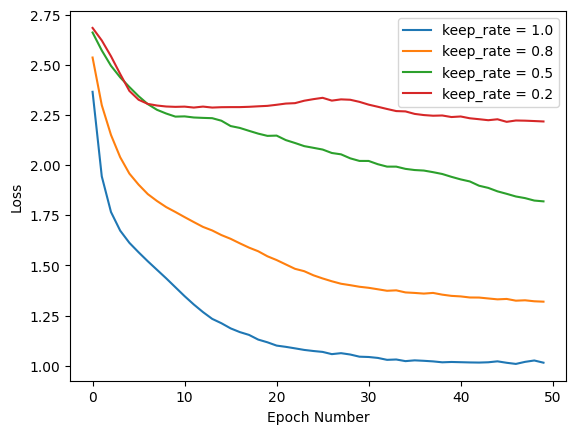

In [ ]:
# plot


for i in range(len(keep_rate_option)):
    
    plt.plot(d_holder[0][i][0],label=f'keep_rate = {keep_rate_option[i]:.1f}')
    
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.savefig('visual_outputs/dropout_loss.png')
plt.show()

In [22]:
loss = []
train_acc = []
dev_acc = []
train_precision = []
dev_precision = []
train_recall = []
dev_recall = []
train_f1 = []
dev_f1 = []
model = []

In [23]:
for opt in optimiser_option:    
    nn = MlpV2(learning_rate=lr, batch_size=batch_size)
    nn.set_optimiser(opt_type=opt[0], params = opt[1])
    nn.set_batchNormalizer()
    nn.add_layer(128,512,"leaky_relu",1)
    nn.add_layer(512,256,"leaky_relu",1)
    nn.add_layer(256,128,"leaky_relu",1)
    nn.add_layer(128,64,"leaky_relu",1)
    nn.add_layer(64,10,"softmax",1)
    
    train_loss = nn.fit(X_train, y_train, epochs=50)
    loss.append(train_loss)

    acc = nn.evaluate(X_train, y_train)
    train_acc.append(acc)
    
    t_acc = nn.evaluate(X_dev, y_dev)
    dev_acc.append(t_acc)
        
    y_pred_train = np.argmax(nn.predict(X_train), axis=1)
    y_train_transformed = np.argmax(y_train, axis=1)
    y_pred_dev = np.argmax(nn.predict(X_dev), axis=1)
    y_dev_transformed = np.argmax(y_dev, axis=1)
        
    precision = precision_score(y_train_transformed, y_pred_train, average='macro')
    recall = recall_score(y_train_transformed, y_pred_train, average='macro')
    f1 = f1_score(y_train_transformed, y_pred_train, average='macro')
        
    train_precision.append(precision)
    train_recall.append(recall)
    train_f1.append(f1)
        
    t_precision = precision_score(y_dev_transformed, y_pred_dev, average='macro')
    t_recall = recall_score(y_dev_transformed, y_pred_dev, average='macro')
    t_f1 = f1_score(y_dev_transformed, y_pred_dev, average='macro')
        
    dev_precision.append(t_precision)
    dev_recall.append(t_recall)
    dev_f1.append(t_f1)

    model.append(nn)

Epoch: 1  Training Loss: 2.324820432929348  Time (sec): 14.063395023345947
Epoch: 2  Training Loss: 1.9199023332179064  Time (sec): 12.972309112548828
Epoch: 3  Training Loss: 1.7565625377052032  Time (sec): 13.07403564453125
Epoch: 4  Training Loss: 1.6683181742100446  Time (sec): 12.147449016571045
Epoch: 5  Training Loss: 1.60725585734846  Time (sec): 9.742398262023926
Epoch: 6  Training Loss: 1.5575824946427896  Time (sec): 10.172914505004883
Epoch: 7  Training Loss: 1.5108225096075194  Time (sec): 9.778759479522705
Epoch: 8  Training Loss: 1.4639919314150955  Time (sec): 10.493082761764526
Epoch: 9  Training Loss: 1.4138244797758157  Time (sec): 10.561756372451782
Epoch: 10  Training Loss: 1.365341415628014  Time (sec): 11.632892370223999
Epoch: 11  Training Loss: 1.3150072749728223  Time (sec): 11.015540838241577
Epoch: 12  Training Loss: 1.2665386766378146  Time (sec): 9.851653575897217
Epoch: 13  Training Loss: 1.2265114291468684  Time (sec): 10.143876314163208
Epoch: 14  Train

In [24]:
o_holder = [loss,train_acc,dev_acc,train_precision,dev_precision,train_recall,dev_recall,train_f1,dev_f1, model]

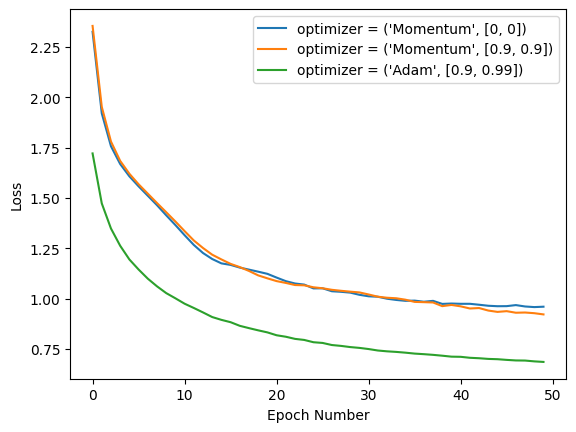

In [25]:
for i in range(len(optimiser_option)):
    
    plt.plot(o_holder[0][i][0],label=f'optimizer = {optimiser_option[i]}')
    
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
#plt.savefig('visual_outputs/optimizer_loss.png')
plt.show()

In [26]:
loss = []
train_acc = []
dev_acc = []
train_precision = []
dev_precision = []
train_recall = []
dev_recall = []
train_f1 = []
dev_f1 = []
model = []

In [ ]:
for strength in weight_decay_strength:
    
    nn = MlpV2(learning_rate=lr, batch_size=batch_size)
    nn.set_optimiser(opt_type='Adam', params = [0.9,0.99])
    nn.set_batchNormalizer()
    nn.set_regularizer(strength)
    nn.add_layer(128,512,"leaky_relu",1)
    nn.add_layer(512,256,"leaky_relu",1)
    nn.add_layer(256,128,"leaky_relu",1)
    nn.add_layer(128,64,"leaky_relu",1)
    nn.add_layer(64,10,"softmax",1)
    
    train_loss = nn.fit(X_train, y_train, epochs=50)
    loss.append(train_loss)

    acc = nn.evaluate(X_train, y_train)
    train_acc.append(acc)
    
    t_acc = nn.evaluate(X_dev, y_dev)
    dev_acc.append(t_acc)
        
    y_pred_train = np.argmax(nn.predict(X_train), axis=1)
    y_train_transformed = np.argmax(y_train, axis=1)
    y_pred_dev = np.argmax(nn.predict(X_dev), axis=1)
    y_dev_transformed = np.argmax(y_dev, axis=1)
        
    precision = precision_score(y_train_transformed, y_pred_train, average='macro')
    recall = recall_score(y_train_transformed, y_pred_train, average='macro')
    f1 = f1_score(y_train_transformed, y_pred_train, average='macro')
        
    train_precision.append(precision)
    train_recall.append(recall)
    train_f1.append(f1)
        
    t_precision = precision_score(y_dev_transformed, y_pred_dev, average='macro')
    t_recall = recall_score(y_dev_transformed, y_pred_dev, average='macro')
    t_f1 = f1_score(y_dev_transformed, y_pred_dev, average='macro')
        
    dev_precision.append(t_precision)
    dev_recall.append(t_recall)
    dev_f1.append(t_f1)

    model.append(nn)

Epoch: 1  Training Loss: 1.7433225262466623  Time (sec): 21.922641038894653
Epoch: 2  Training Loss: 1.5158025323591737  Time (sec): 18.484023571014404
Epoch: 3  Training Loss: 1.403700653165607  Time (sec): 15.155503511428833
Epoch: 4  Training Loss: 1.3417474017169086  Time (sec): 15.520502805709839
Epoch: 5  Training Loss: 1.3151253964260252  Time (sec): 16.020148515701294
Epoch: 6  Training Loss: 1.3164795595291268  Time (sec): 15.467671871185303
Epoch: 7  Training Loss: 1.3430210932885653  Time (sec): 18.35488224029541
Epoch: 8  Training Loss: 1.3947320168439528  Time (sec): 22.001055240631104
Epoch: 9  Training Loss: 1.4784031165727423  Time (sec): 20.086249828338623
Epoch: 10  Training Loss: 1.579607035972991  Time (sec): 16.83900284767151
Epoch: 11  Training Loss: 1.7042185929086067  Time (sec): 15.305037260055542
Epoch: 12  Training Loss: 1.8499806257263494  Time (sec): 16.01318073272705
Epoch: 13  Training Loss: 2.0188338541150577  Time (sec): 15.726945400238037
Epoch: 14  Tr

In [ ]:
w_holder = [loss,train_acc,dev_acc,train_precision,dev_precision,train_recall,dev_recall,train_f1,dev_f1,model]

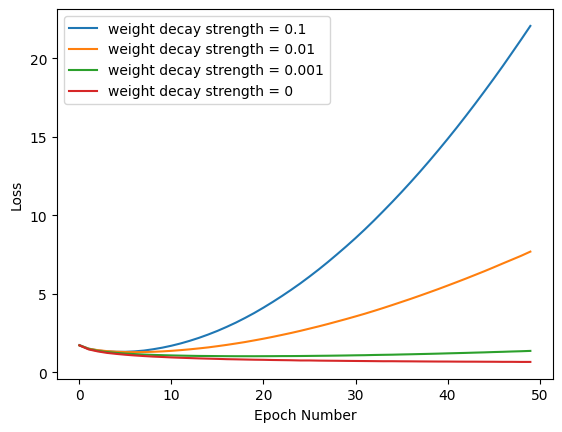

In [ ]:
for i in range(len(weight_decay_strength)):
    
    plt.plot(w_holder[0][i][0],label=f'weight decay strength = {weight_decay_strength[i]}')
    
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.savefig('visual_outputs/weight_decay_strength_loss.png')
plt.show()